In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from run_evolution import folder_evol
from analytical_results import fT00, fT01, fT11, fj0, fj1, fnu, fLn
from ploting import plot_heatmaps

In [18]:
NUM_COLORS = 15
cm = plt.get_cmap('gist_rainbow')
colors = [cm(i / NUM_COLORS) for i in range(NUM_COLORS)]
lines = [':', '--', '-']

In [19]:
g = 1
v, Q = 1, 1
tol, method = 1e-6, '12site'
#
ms = [0, 0.1, 0.2, 0.318309886, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.5]
mg = [g * x for x in ms]
NaDdt =  [(512, 0.125, 1024, 1/16)]  # (512, 0.0625, 256, 1/16),
NaDdt =  [(1024, 0.0625, 512, 1/16), (1024, 0.0625, 1024, 1/16)]  # (512, 0.0625, 256, 1/16),

data = {}

for m in ms:
    for N, a, D, dt in NaDdt:
        D0 = D
        try:
            folder = folder_evol(g, m, a, N, v, Q, D0, dt, D, tol, method, mkdir=False)
            data[m, N, a, dt] = np.load(folder / f"results.npy", allow_pickle=True).item()
        except FileNotFoundError:
            pass

In [20]:
def get_tsm(signals, ev):
    tm = signals["time"]
    mask = tm > -1
    tm = tm[mask]
    ee = signals[ev][mask]
    ee = ee - ee[0, :]
    ee = (ee[:, 0::2] + ee[:, 1::2]) / 2  # average over 2*n and 2*n+1
    mid = (ee[:, N//4] +ee[:, N//4-1])/2
    return tm, ee, mid

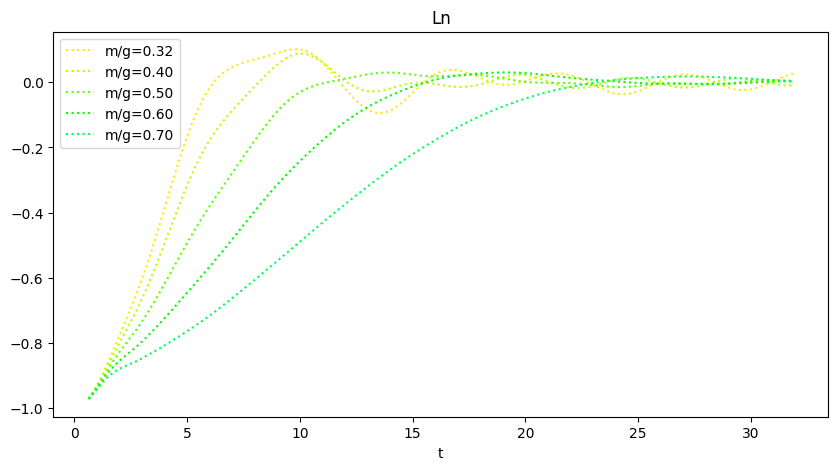

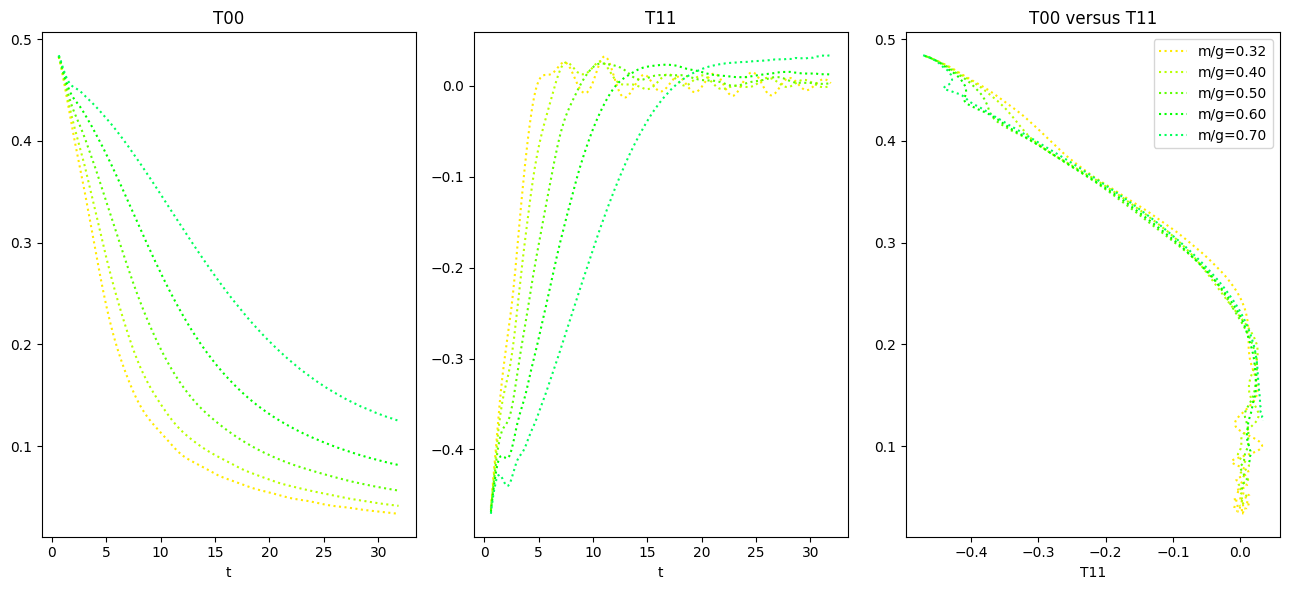

In [22]:

sel = [3, 4, 5, 6, 7]

plt.figure(figsize=(10, 5))

Nadt = [(1024, 0.0625, 1/16)]

for j, (N, a, dt) in enumerate(Nadt):
    for i, m in enumerate(ms):
        if i not in sel:
            continue
        tm, ee, mid = get_tsm(data[m, N, a, dt], 'Ln')
        line, = plt.plot(tm[10:-2], mid[10:-2], lines[j], color=colors[i], label=f'{m/g=:.2f}')
        if j == 2:
            line.set_label(f'{m/g=:.2f}')

plt.legend()
plt.xlabel('t')
plt.title('Ln')

fig, ax = plt.subplots(1, 3, figsize=(13, 6))

for j, (N, a, dt) in enumerate(Nadt):
    for i, m in enumerate(ms):
        if i not in sel:
            continue

        tm, ee, midE = get_tsm(data[m, N, a, dt], 'T00')
        tm, ee, midp = get_tsm(data[m, N, a, dt], 'T11')
        ax[0].plot(tm[10:-2], midE[10:-2], lines[j], color=colors[i], label=f'{m/g=:.2f}')
        ax[1].plot(tm[10:-2], midp[10:-2], lines[j], color=colors[i], label=f'{m/g=:.2f}')
        ax[2].plot(midp[10:-2], midE[10:-2], lines[j], color=colors[i], label=f'{m/g=:.2f}')

ax[0].set_title('T00')
ax[1].set_title('T11')
ax[2].set_title('T00 versus T11')

ax[0].set_xlabel('t')
ax[1].set_xlabel('t')
ax[2].set_xlabel('T11')

plt.legend()

plt.tight_layout()

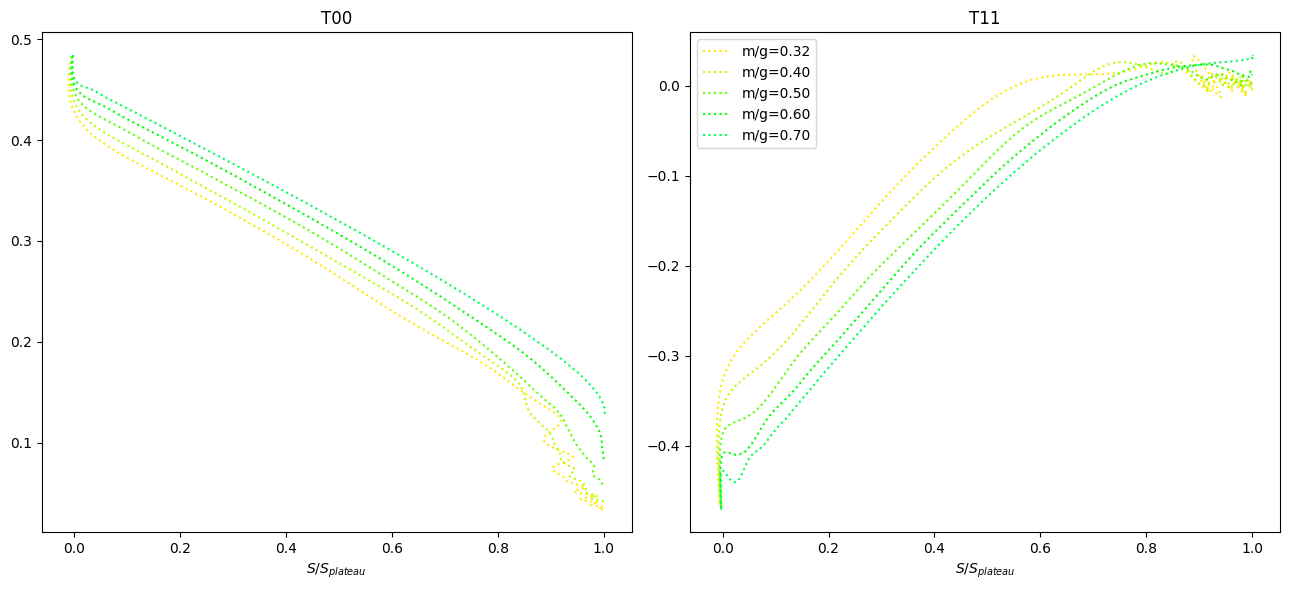

In [23]:
# FIG 6

fig, ax = plt.subplots(1, 2, figsize=(13, 6))

for j, (N, a, dt) in enumerate(Nadt):
    for i, m in enumerate(ms):
        if i not in sel:
            continue

        ee = data[m, N, a, dt]["entropy_1"]
        eemid = ee[:, N // 2] - ee[0, N // 2]
        eerel = eemid/eemid[-1]


        tm, ee, midE = get_tsm(data[m, N, a, dt], 'T00')
        tm, ee, midp = get_tsm(data[m, N, a, dt], 'T11')
        ax[0].plot(eerel[10:-2], midE[10:-2], lines[j], color=colors[i], label=f'{m/g=:.2f}')
        ax[1].plot(eerel[10:-2], midp[10:-2], lines[j], color=colors[i], label=f'{m/g=:.2f}')

        # ax[0].plot(tm[10:-2], midE[10:-2], lines[j], color=colors[i], label=f'{m/g=:.2f}')
        # ax[1].plot(tm[10:-2], midp[10:-2], lines[j], color=colors[i], label=f'{m/g=:.2f}')


ax[0].set_title('T00')
ax[1].set_title('T11')

ax[0].set_xlabel(r'$S/S_{plateau}$')
ax[1].set_xlabel(r'$S/S_{plateau}$')

plt.legend()

plt.tight_layout()


Text(0.5, 1.0, 't=30.0 N=1024 a=0.0625 D=1024')

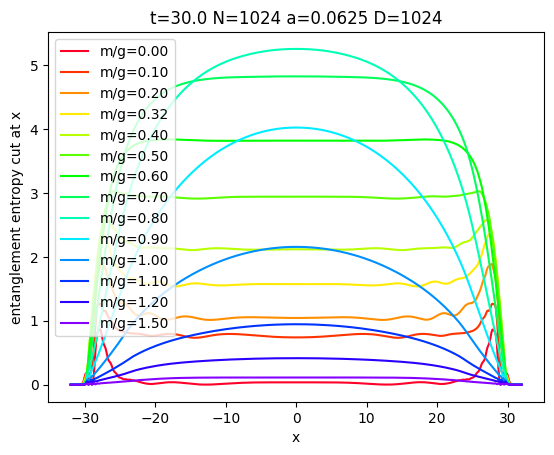

In [24]:

# FIG 7 left

plt.figure()

ttt = 30.0

for j, (N, a, dt) in enumerate(Nadt):
    for i, m in enumerate(ms):
        tm = data[m, N, a, dt]["time"]
        i0 = np.argmin(abs(tm - ttt))

        ee = data[m, N, a, dt]["entropy_1"]
        ee = ee - ee[0]

        ee = (ee[:, 1:-2:2] + ee[:, 2:-1:2] ) / 2

        xmax = N * a / 2
        xs = np.linspace(-xmax, xmax, ee.shape[-1])

        plt.plot(xs, ee[i0], color=colors[i], label=f'{m/g=:.2f}')
        np.savetxt(f'S_t=30_{m=:.2f}.txt', np.column_stack([xs, ee[i0]]))

plt.legend()
plt.xlabel('x')
plt.ylabel('entanglement entropy cut at x')
plt.title(f't={tm[i0]:0.1f} {N=} {a=} {D=}')


512
513
-30.11764705882353
-27.607843137254903
-25.098039215686274
-22.588235294117645
-20.07843137254902
-17.568627450980394
-15.058823529411764
-12.549019607843139
-10.03921568627451
-7.529411764705884
-5.019607843137255
-2.509803921568629
0.0
2.5098039215686256
5.019607843137251
7.529411764705884
10.03921568627451
12.549019607843135
15.058823529411761
17.568627450980394
20.07843137254902
22.588235294117645
25.09803921568627
27.607843137254903
30.11764705882353
-30.11764705882353
-27.607843137254903
-25.098039215686274
-22.588235294117645
-20.07843137254902
-17.568627450980394
-15.058823529411764
-12.549019607843139
-10.03921568627451
-7.529411764705884
-5.019607843137255
-2.509803921568629
0.0
2.5098039215686256
5.019607843137251
7.529411764705884
10.03921568627451
12.549019607843135
15.058823529411761
17.568627450980394
20.07843137254902
22.588235294117645
25.09803921568627
27.607843137254903
30.11764705882353
-30.11764705882353
-27.607843137254903
-25.098039215686274
-22.588235294

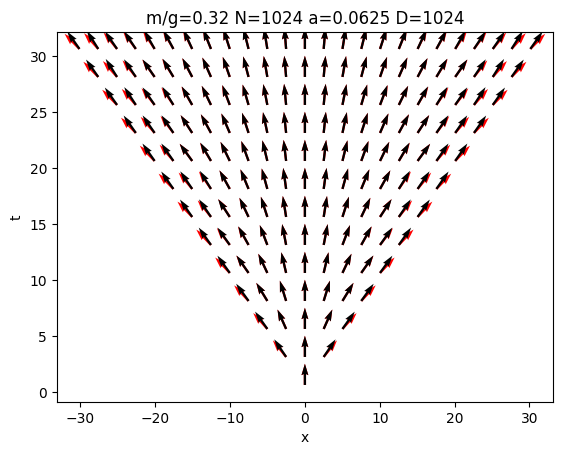

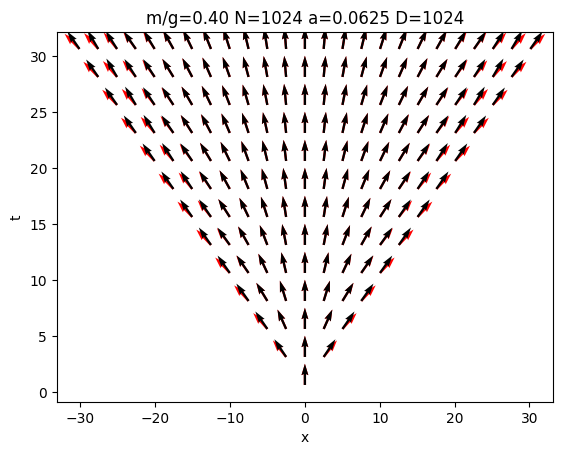

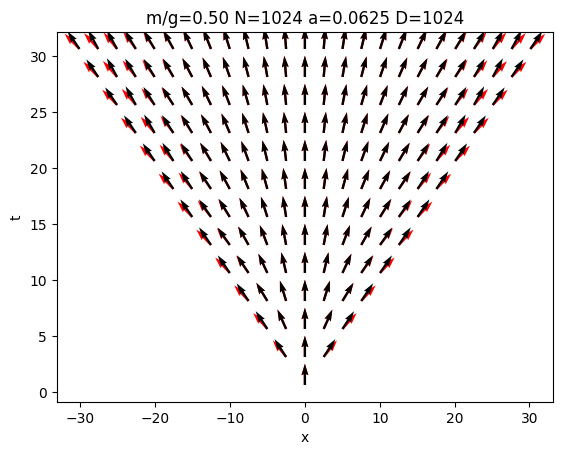

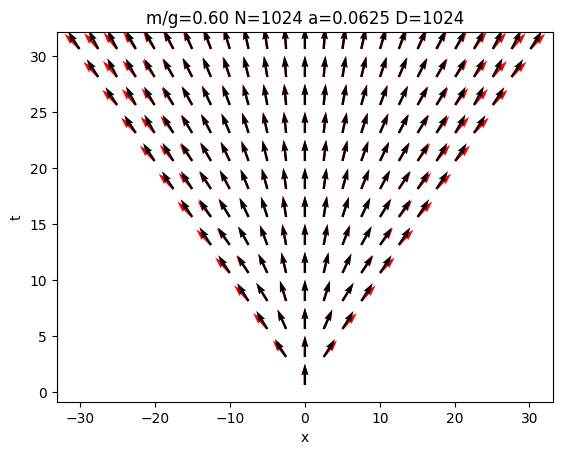

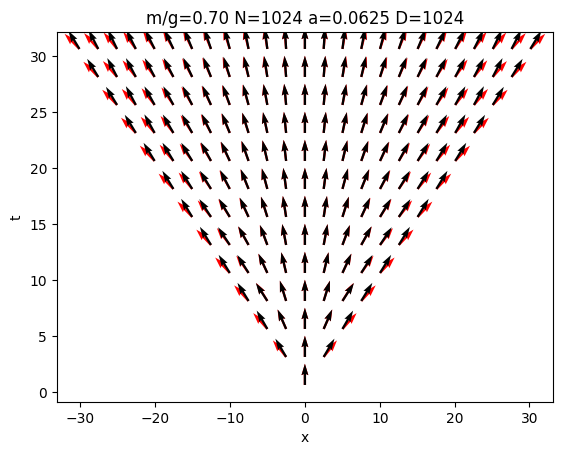

In [26]:

def sqrtreg(arr):
    out = np.zeros_like(arr)
    out[arr>0] = np.sqrt(arr[arr>0])
    return out

def divreg(arr1, arr2):
    out = np.zeros_like(arr1)
    out[arr2 != 0] = arr1[arr2 != 0] / arr2[arr2 != 0]
    return out

# for j, (N, a, D, dt) in enumerate(NaDdt):
#     for i, m in enumerate(ms):
#         if i not in sel:
#             continue


#         tm, T00, midE = get_tsm(data[m, N, a, D, dt], 'T00')
#         tm, T11, midp = get_tsm(data[m, N, a, D, dt], 'T11')
#         tm, T01, midp = get_tsm(data[m, N, a, D, dt], 'T01')

#         # print(T00.shape, T11.shape, T01.shape)

#         T00 = (T00[:, 1:] + T00[:, :-1])/2
#         T11 = (T11[:, 1:] + T11[:, :-1])/2

#         xmax = N * a / 2
#         xs = np.linspace(-xmax, xmax, T00.shape[-1])

#         x = np.zeros_like(T00)
#         t = np.zeros_like(T00)
#         x[:, :] = xs[np.newaxis, :]
#         t[:, :] = tm[:, np.newaxis]

#         tau2 = t**2 - x**2
#         tau = np.ones_like(tau2)
#         tau[tau2>0] = np.sqrt(tau2[tau2>0])

#         # ut = t/tau
#         # ux = x/tau

#         # eps = T00*ut*ut+T11*ux*ux-2*T01*ut*ux

#         # eps[tau2<=4] = 0

#         # eps = 1/2*(T00 - T11 + np.sqrt((T00+T11)**2-4*T01**2))
#         epsreg = 1/2*(T00 - T11 + sqrtreg((T00+T11)**2-4*T01**2))

#         logepsreg = np.log(epsreg)

#         #eps[tau2<0] = 0
#         epsreg[tau2<0] = 0
#         logepsreg[tau2<0] = 0


#         sqr = (T00+T11)**2-4*T01**2
#         sqr[tau2<=0] = 0

#         plt.figure()
#         # plt.imshow(T00, extent=(-xmax, xmax, 0, tm[-1]), origin='lower')
#         plt.imshow(epsreg, extent=(-xmax, xmax, 0, tm[-1]), origin='lower')
#         # plt.colorbar()
#         plt.title(f'{m/g=:.2f}')

#         # plt.figure()
#         # plt.plot(T00[i0])
#         # plt.plot(T11[i0])
#         # plt.plot(T01[i0])
#         # plt.axhline(0)



# FIG 3 middle


for j, (N, a, dt) in enumerate(Nadt):
    for i, m in enumerate(ms):
        if i not in sel:
            continue


        tm, T00, midE = get_tsm(data[m, N, a, dt], 'T00')
        tm, T11, midp = get_tsm(data[m, N, a, dt], 'T11')
        tm, T01, midp = get_tsm(data[m, N, a, dt], 'T01')

        # print(T00.shape, T11.shape, T01.shape)

        T00 = (T00[:, 1:] + T00[:, :-1]) / 2
        T11 = (T11[:, 1:] + T11[:, :-1]) / 2

        xmax = N * a / 2
        xs = np.linspace(-xmax, xmax, T00.shape[-1])

        x = np.zeros_like(T00)
        t = np.zeros_like(T00)
        x[:, :] = xs[np.newaxis, :]
        t[:, :] = tm[:, np.newaxis]

        tau2 = t**2 - x**2

        vt = 1
        vx = 2 * divreg(T01, (T00 + T11 + sqrtreg((T00 + T11) ** 2 - 4 * T01 ** 2)))
        norm = np.sqrt(1 + vx ** 2)
        vt = vt / norm
        vx = vx / norm

        Xs = []
        Ys = []
        Us = []
        Vs = []

        Xsb = []
        Ysb = []
        Usb = []
        Vsb = []

        print( N // 2)
        print( len(tm))

        for i in range(10, len(tm), 40):
            for j in range(15, N // 2, 20):
                t = tm[i]
                x = xs[j]
                print(x)
                if np.abs(t)>np.abs(x):
                    Xs.append(x)
                    Ys.append(t)
                    Us.append(vx[i, j])
                    Vs.append(vt[i, j])

                    Xsb.append(x)
                    Ysb.append(t)
                    Usb.append(x/np.sqrt(t**2 + x**2))
                    Vsb.append(t/np.sqrt(t**2 + x**2))

        plt.figure()

        plt.quiver(Xsb, Ysb, Usb, Vsb, color='r')
        plt.quiver(Xs, Ys, Us, Vs)

        np.savetxt(f'field_r_{m=:.2f}.txt', np.column_stack([Xsb, Ysb, Usb, Vsb]), header='x y u v')
        np.savetxt(f'field_k_{m=:.2f}.txt', np.column_stack([Xs, Ys, Us, Vs]), header='x y u v')


        plt.xlabel('x')
        plt.ylabel('t')
        plt.title(f'{m/g=:.2f} {N=} {a=} {D=}')





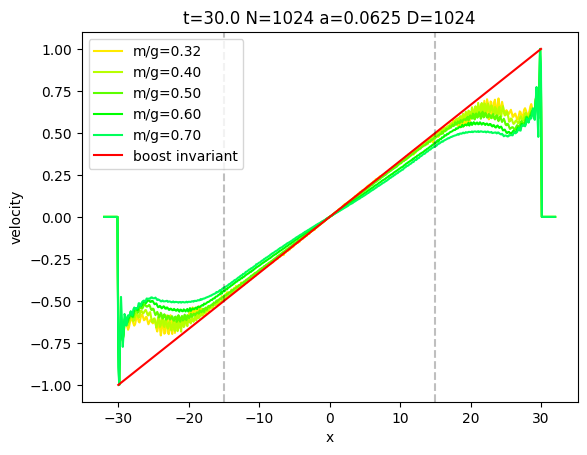

In [29]:

# FIG. 3 right

plt.figure()

for j, (N, a, dt) in enumerate(Nadt):
    for i, m in enumerate(ms):
        if i not in sel:
            continue


        tm, T00, midE = get_tsm(data[m, N, a,  dt], 'T00')
        tm, T11, midp = get_tsm(data[m, N, a,  dt], 'T11')
        tm, T01, midp = get_tsm(data[m, N, a,  dt], 'T01')

        # print(T00.shape, T11.shape, T01.shape)

        T00 = (T00[:, 1:] + T00[:, :-1])/2
        T11 = (T11[:, 1:] + T11[:, :-1])/2

        xmax = N * a / 2
        xs = np.linspace(-xmax, xmax, T00.shape[-1])

        vt = 1
        vx = divreg(2 * T01, (T00 + T11 + sqrtreg((T00 + T11) ** 2 - 4 * T01 ** 2)))
        norm = np.sqrt(1 + vx**2)
        vt = vt/norm
        vx = vx/norm

        ratio = vx/vt
        ratio[tau2<=0] = 0
        ratio = np.clip(ratio, -1, 1)

        plt.plot(xs, ratio[i0], color=colors[i], label=f'{m/g=:.2f}')
        # plt.imshow(ratio, extent=(-xmax, xmax, 0, tm[-1]), origin='lower')
        # plt.colorbar

plt.plot([-30,30],[-1,1], color='r', alpha=1.0, label='boost invariant')

plt.legend()
plt.xlabel('x')
plt.ylabel('velocity')
plt.title(f't={tm[i0]:0.1f} {N=} {a=} {D=}')


plt.axvline(-15, color='k', alpha=0.25, linestyle='dashed')
plt.axvline(15, color='k', alpha=0.25, linestyle='dashed')


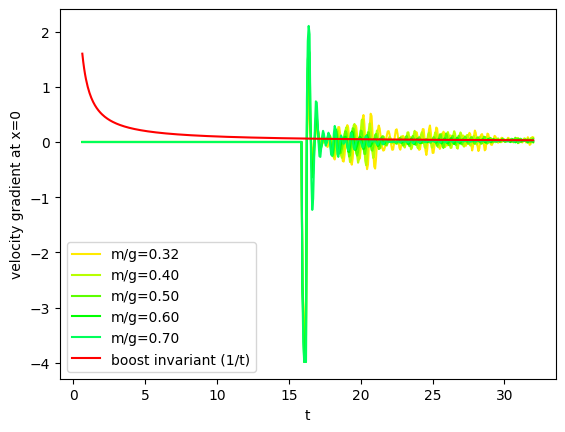

In [31]:

plt.figure()

for j, (N, a, dt) in enumerate(Nadt):
    for i, m in enumerate(ms):
        if i not in sel:
            continue


        tm, T00, midE = get_tsm(data[m, N, a, dt], 'T00')
        tm, T11, midp = get_tsm(data[m, N, a, dt], 'T11')
        tm, T01, midp = get_tsm(data[m, N, a, dt], 'T01')

        # print(T00.shape, T11.shape, T01.shape)

        T00 = (T00[:, 1:] + T00[:, :-1])/2
        T11 = (T11[:, 1:] + T11[:, :-1])/2

        xmax = N * a / 2
        xs = np.linspace(-xmax, xmax, T00.shape[-1])

        vt = 1
        vx = divreg(2 * T01, (T00 + T11 + sqrtreg((T00 + T11) ** 2 - 4 * T01 ** 2)))
        norm = np.sqrt(1 + vx**2)
        vt = vt/norm
        vx = vx/ norm

        ratio = divreg(vx, vt)
        ratio[tau2<=0] = 0
        ratio = np.clip(ratio, -1, 1)

        dn = 1
        dratio = (ratio[:, 127+dn] - ratio[:, 127-dn])/(xs[127+dn]-xs[127-dn])

        plt.plot(tm[10:], dratio[10:], color=colors[i], label=f'{m/g=:.2f}')

plt.plot(tm[10:], 1/tm[10:], color='r', label='boost invariant (1/t)')

plt.legend()
plt.xlabel('t')
plt.ylabel('velocity gradient at x=0')

plt.show()


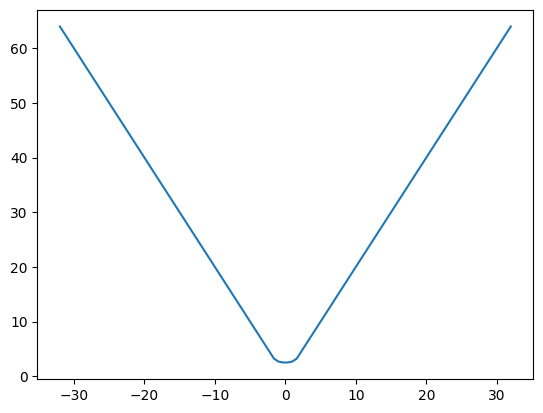

In [6]:
xs = np.linspace(-32, 32, 100)
y0 = 2 * np.abs(xs)
y1 = np.sqrt(2.5 ** 2 + xs ** 2)
yy = np.max(np.column_stack([y0, y1]), axis=1)
plt.plot(xs, yy)
